In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import warnings
from shapely.geometry import shape
plt.style.use('ggplot')
warnings.filterwarnings("ignore")
import pandas as pd

In [ ]:
df_green = pd.read_pickle('TLC\green_taxi\green_taxi_yearly.pkl')
df_yellow = pd.read_pickle('TLC\yellow_taxi\yellow_taxi_yearly.pkl')

In [ ]:
df_lookup = pd.read_csv("taxi+_zone_lookup.csv")

In [ ]:
df_lookup[df_lookup['Borough']=='Queens']['Corrresponding Transit District '].unique()

array([nan, 20., 23.])

In [ ]:
borough_location_dict = dict()
borough_district_dict = dict()
# df_lookup['Corrresponding Transit District ']

In [ ]:
# df_lookup[df_lookup['Borough']=='Queens']['LocationID'].unique()
boroughs = df_lookup['Borough'].unique()
for borough in boroughs:
    borough_location_dict[borough] = df_lookup[df_lookup['Borough']==borough]['LocationID'].unique().tolist()
districts = df_lookup['Corrresponding Transit District '].unique()
for dist in districts:
    borough_district_dict[dist] = df_lookup[df_lookup['Corrresponding Transit District ']==dist]['LocationID'].unique().tolist()

NameError: ignored

In [ ]:
borough_location_dict

{'EWR': [1],
 'Queens': [2,
  7,
  8,
  9,
  10,
  15,
  16,
  19,
  27,
  28,
  30,
  38,
  53,
  56,
  57,
  64,
  70,
  73,
  82,
  83,
  86,
  92,
  93,
  95,
  96,
  98,
  101,
  102,
  117,
  121,
  122,
  124,
  129,
  130,
  131,
  132,
  134,
  135,
  138,
  139,
  145,
  146,
  157,
  160,
  171,
  173,
  175,
  179,
  180,
  191,
  192,
  193,
  196,
  197,
  198,
  201,
  203,
  205,
  207,
  215,
  216,
  218,
  219,
  223,
  226,
  252,
  253,
  258,
  260],
 'Bronx': [3,
  18,
  20,
  31,
  32,
  46,
  47,
  51,
  58,
  59,
  60,
  69,
  78,
  81,
  94,
  119,
  126,
  136,
  147,
  159,
  167,
  168,
  169,
  174,
  182,
  183,
  184,
  185,
  199,
  200,
  208,
  212,
  213,
  220,
  235,
  240,
  241,
  242,
  247,
  248,
  250,
  254,
  259],
 'Manhattan': [4,
  12,
  13,
  24,
  41,
  42,
  43,
  45,
  48,
  50,
  68,
  74,
  75,
  79,
  87,
  88,
  90,
  100,
  103,
  104,
  105,
  107,
  113,
  114,
  116,
  120,
  125,
  127,
  128,
  137,
  140,
  141,
  142,
  

In [ ]:
df_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUDistrict,PUBorough,DOBorough,DODistrict
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,None,0.3,4.80,2.0,1.0,0.00,3.0,Manhattan,Manhattan,3.0
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,None,0.3,10.80,2.0,1.0,0.00,3.0,Manhattan,Manhattan,3.0
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,None,0.3,23.15,1.0,1.0,2.75,3.0,Manhattan,Manhattan,4.0
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,None,0.3,9.30,2.0,1.0,0.00,30.0,Brooklyn,Brooklyn,30.0
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,None,0.3,31.26,1.0,1.0,2.75,30.0,Brooklyn,Manhattan,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840397,2,2022-12-31 23:33:00,2022-12-31 23:49:00,None,NaN,33,79,NaN,3.53,20.72,...,None,1.0,29.36,NaN,NaN,NaN,30.0,Brooklyn,Manhattan,4.0
840398,2,2022-12-31 23:29:00,2023-01-01 00:01:00,None,NaN,49,197,NaN,8.94,39.01,...,None,1.0,48.01,NaN,NaN,NaN,30.0,Brooklyn,Queens,20.0
840399,2,2022-12-31 23:05:00,2022-12-31 23:12:00,None,NaN,54,181,NaN,1.27,12.11,...,None,1.0,15.73,NaN,NaN,NaN,NaN,Brooklyn,Brooklyn,30.0
840400,2,2022-12-31 23:03:00,2022-12-31 23:18:00,None,NaN,7,129,NaN,2.23,15.51,...,None,1.0,19.81,NaN,NaN,NaN,20.0,Queens,Queens,20.0


In [ ]:
def classify_locations(id_value):
    for class_name, id_list in borough_location_dict.items():
        if id_value in id_list:
            return class_name
    return None
def classify_district(id_value):
    for class_name, id_list in borough_district_dict.items():
        if id_value in id_list:
            return class_name
    return None

In [ ]:
df_green["PUBorough"] = df_green['PULocationID'].apply(classify_locations)
df_green["PUDistrict"] = df_green['PULocationID'].apply(classify_district)
df_green["DOBorough"] = df_green['DOLocationID'].apply(classify_locations)
df_green["DODistrict"] = df_green['DOLocationID'].apply(classify_district)

In [ ]:
df_yellow["PUBorough"] = df_yellow['PULocationID'].apply(classify_locations)
df_yellow["PUDistrict"] = df_yellow['PULocationID'].apply(classify_district)
df_yellow["DOBorough"] = df_yellow['DOLocationID'].apply(classify_locations)
df_yellow["DODistrict"] = df_yellow['DOLocationID'].apply(classify_district)

In [ ]:
pu_borough_green = df_green.groupby(['PUBorough'], as_index=False).size()
do_borough_green = df_green.groupby(['DOBorough'], as_index=False).size()

In [ ]:
pu_borough_green

,PUBorough,size
0,Bronx,26958
1,Brooklyn,133777
2,EWR,53
3,Manhattan,478355
4,Queens,197193
5,Staten Island,199
6,Unknown,3867


In [ ]:
do_borough_green

,DOBorough,size
0,Bronx,40261
1,Brooklyn,107956
2,EWR,697
3,Manhattan,484528
4,Queens,194106
5,Staten Island,230
6,Unknown,12624


In [ ]:
pu_borough_yellow = df_yellow.groupby(['PUBorough'], as_index=False).size()
do_borough_yellow = df_yellow.groupby(['DOBorough'], as_index=False).size()

In [ ]:
pu_borough_yellow

,PUBorough,size
0,Bronx,52181
1,Brooklyn,291184
2,EWR,10126
3,Manhattan,35281758
4,Queens,3453358
5,Staten Island,3233
6,Unknown,564258


In [ ]:
do_borough_yellow

,DOBorough,size
0,Bronx,249225
1,Brooklyn,1560943
2,EWR,114295
3,Manhattan,35026499
4,Queens,2262184
5,Staten Island,11238
6,Unknown,431714


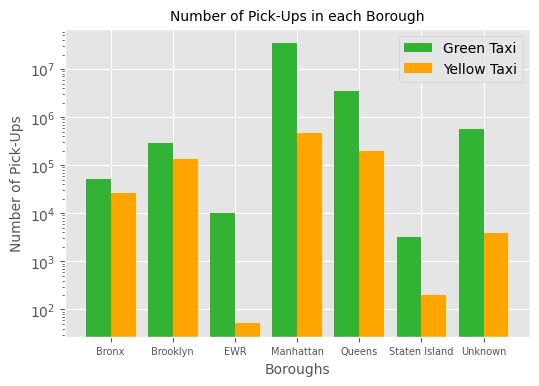

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming do_borough_yellow, pu_borough_yellow, and pu_borough_green are already defined

X = do_borough_yellow.DOBorough.unique().tolist()
green_pu_borough = pu_borough_yellow['size'].tolist()
yellow_pu_borough = pu_borough_green['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
green_color = (0.2, # redness
                0.7, # greenness
                0.2, # blueness
                1.0 # transparency
                )
yellow_color = (0.5, # redness
                0., # greenness
                0.5, # blueness
                0.6 # transparency
                )
plt.bar(X_axis - 0.2, green_pu_borough, 0.4, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.2, yellow_pu_borough, 0.4, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=10)
plt.ylabel("Number of Pick-Ups", fontsize=10)
plt.title("Number of Pick-Ups in each Borough", fontsize=10)
plt.legend()
plt.show()

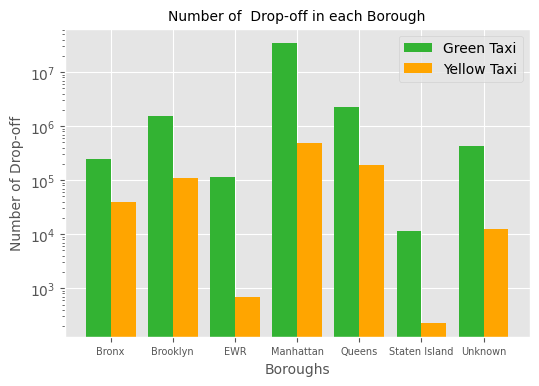

In [ ]:
X = do_borough_yellow.DOBorough.unique().tolist()
green_do_borough = do_borough_yellow['size'].tolist()
yellow_do_borough = do_borough_green['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
green_color = (0.2, # redness
                0.7, # greenness
                0.2, # blueness
                1.0 # transparency
                )
yellow_color = (0.5, # redness
                0., # greenness
                0.5, # blueness
                0.6 # transparency
                )
plt.bar(X_axis - 0.2, green_do_borough, 0.4, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.2, yellow_do_borough, 0.4, label='Yellow Taxi', color='orange')
# plt.bar(X_axis - 0.4, green_do_borough, 0.2, label='Green Drop-Off', color=green_color)
# plt.bar(X_axis - 0.2, yellow_do_borough, 0.2, label='Yellow Drop-Off', color='orange')
# plt.bar(X_axis + 0.2, green_pu_borough, 0.2, label='Green Pick-Up', color=green_color, hatch='\\\\')
# plt.bar(X_axis + 0.4, yellow_pu_borough, 0.2, label='Yellow Pick-Up', color='orange', hatch='\\\\')

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Boroughs", fontsize=10)
plt.ylabel("Number of Drop-off", fontsize=10)
plt.title("Number of  Drop-off in each Borough", fontsize=10)
plt.legend()
plt.show()

In [ ]:
pu_district_green = df_green.groupby(['PUDistrict'], as_index=False).size()
do_district_green = df_green.groupby(['DODistrict'], as_index=False).size()
pu_district_yellow = df_yellow.groupby(['PUDistrict'], as_index=False).size()
do_district_yellow = df_yellow.groupby(['DODistrict'], as_index=False).size()

In [ ]:
do_district_yellow

,DODistrict,size
0,1.0,9947778
1,2.0,6587483
2,3.0,3112269
3,4.0,14641111
4,11.0,91944
5,12.0,109451
6,20.0,1020920
7,23.0,62280
8,30.0,730816
9,32.0,201519


In [ ]:
pu_district_yellow

,PUDistrict,size
0,1.0,10339293
1,2.0,7120361
2,3.0,2081644
3,4.0,15149561
4,11.0,20587
5,12.0,25917
6,20.0,405041
7,23.0,12424
8,30.0,153290
9,32.0,39546


In [ ]:
pu_district_green

,PUDistrict,size
0,1.0,168905
1,2.0,337
2,3.0,301262
3,4.0,7569
4,11.0,12903
5,12.0,11572
6,20.0,191750
7,23.0,1662
8,30.0,88037
9,32.0,17833


In [ ]:
do_district_green

,DODistrict,size
0,1.0,115277
1,2.0,21764
2,3.0,222760
3,4.0,120268
4,11.0,18320
5,12.0,17106
6,20.0,149799
7,23.0,5059
8,30.0,52850
9,32.0,18500


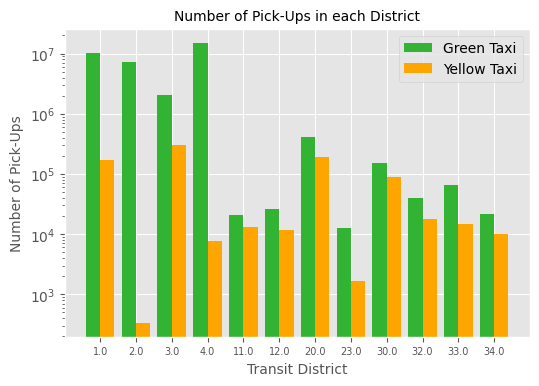

In [ ]:
X = do_district_yellow.DODistrict.unique().tolist()
green_pu_district = pu_district_yellow['size'].tolist()
yellow_pu_district = pu_district_green['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
green_color = (0.2, # redness
                0.7, # greenness
                0.2, # blueness
                1.0 # transparency
                )
yellow_color = (0.5, # redness
                0., # greenness
                0.5, # blueness
                0.6 # transparency
                )
plt.bar(X_axis - 0.2, green_pu_district, 0.4, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.2, yellow_pu_district, 0.4, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Transit District", fontsize=10)
plt.ylabel("Number of Pick-Ups", fontsize=10)
plt.title("Number of Pick-Ups in each District", fontsize=10)
plt.legend()
plt.show()

In [ ]:
df_yellow["PUBorough"] = df_yellow['PULocationID'].apply(classify_locations)
df_yellow["PUDistrict"] = df_yellow['PULocationID'].apply(classify_district)
df_yellow["DOBorough"] = df_yellow['DOLocationID'].apply(classify_locations)
df_yellow["DODistrict"] = df_yellow['DOLocationID'].apply(classify_district)

In [ ]:
df_green_pu_district = df_green[['PUDistrict']]
df_yellow_pu_district = df_yellow[['PUDistrict']]

df_green_du_district = df_green[['DODistrict']]
df_yellow_du_district = df_yellow[['DODistrict']]

df_all_pu_district = pd.concat([df_green_pu_district, df_yellow_pu_district], axis=0)
df_all_do_district = pd.concat([df_green_du_district, df_yellow_du_district], axis=0)

In [ ]:
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month
df_green['day'] = df_green['lpep_pickup_datetime'].dt.day

df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
df_yellow['day'] = df_yellow['tpep_pickup_datetime'].dt.day
# df_green['month']

df_green_day = df_green[['month','day']]
df_yellow_day = df_yellow[['month','day']]

In [ ]:
df_all_day_pu = pd.concat([df_green_day, df_yellow_day], axis=0)
df_all_day_pu

,month,day
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
39656093,12,31
39656094,12,31
39656095,12,31
39656096,12,31


In [ ]:
df_christmas = df_all_day_pu[(df_all_day_pu['day']==25) & (df_all_day_pu['month']==12)]
df_christmas

,month,day
820300,12,25
820301,12,25
820302,12,25
820303,12,25
820304,12,25
...,...,...
39644626,12,25
39644627,12,25
39644628,12,25
39644629,12,25


In [ ]:
df_non_christmas = df_all_day_pu.groupby('day', as_index=False).size()
np.mean(df_non_christmas['size'])

1306338.7096774194

In [ ]:
df_dist_pu = df_all_pu_district.groupby('PUDistrict', as_index=False).size()
df_dist_pu

,PUDistrict,size
0,1.0,10508198
1,2.0,7120698
2,3.0,2382906
3,4.0,15157130
4,11.0,33490
5,12.0,37489
6,20.0,596791
7,23.0,14086
8,30.0,241327
9,32.0,57379


In [ ]:
df_dist_du = df_all_do_district.groupby('DODistrict', as_index=False).size()
df_dist_du


,DODistrict,size
0,1.0,10063055
1,2.0,6609247
2,3.0,3335029
3,4.0,14761379
4,11.0,110264
5,12.0,126557
6,20.0,1170719
7,23.0,67339
8,30.0,783666
9,32.0,220019


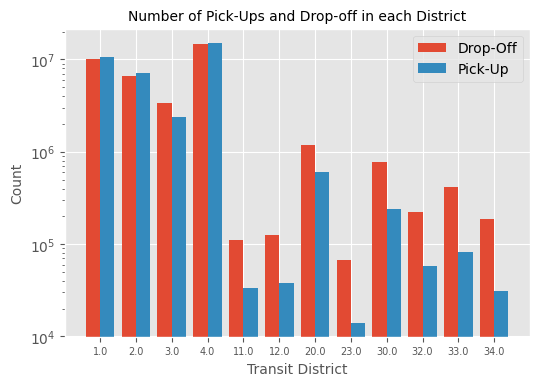

In [ ]:
X = df_dist_du.DODistrict.unique().tolist()
green_pu_district = df_dist_du['size'].tolist()
yellow_pu_district = df_dist_pu['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
green_color = (0.2, # redness
                0.7, # greenness
                0.2, # blueness
                1.0 # transparency
                )
yellow_color = (0.5, # redness
                0., # greenness
                0.5, # blueness
                0.6 # transparency
                )
plt.bar(X_axis - 0.2, green_pu_district, 0.4, label='Drop-Off')
plt.bar(X_axis + 0.2, yellow_pu_district, 0.4, label='Pick-Up')

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Transit District", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Number of Pick-Ups and Drop-off in each District", fontsize=10)
plt.legend()
plt.show()

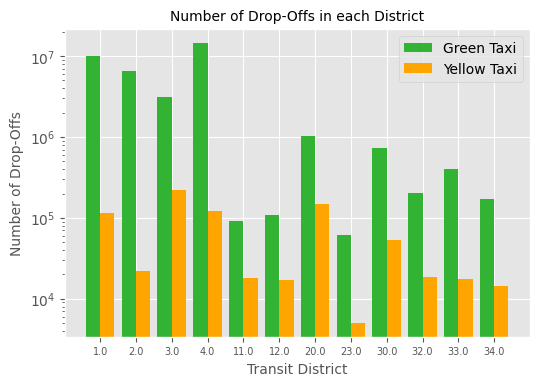

In [ ]:
X = do_district_yellow.DODistrict.unique().tolist()
green_do_district = do_district_yellow['size'].tolist()
yellow_do_district = do_district_green['size'].tolist()

X_axis = np.arange(len(X))

# Set the figure size
plt.figure(figsize=(6, 4))

# Set the bar colors to green and yellow
green_color = (0.2, # redness
                0.7, # greenness
                0.2, # blueness
                1.0 # transparency
                )
yellow_color = (0.5, # redness
                0., # greenness
                0.5, # blueness
                0.6 # transparency
                )
plt.bar(X_axis - 0.2, green_do_district, 0.4, label='Green Taxi', color=green_color)
plt.bar(X_axis + 0.2, yellow_do_district, 0.4, label='Yellow Taxi', color='orange')

plt.xticks(X_axis, X, fontsize=7)
plt.yscale('log')
plt.xlabel("Transit District", fontsize=10)
plt.ylabel("Number of Drop-Offs", fontsize=10)
plt.title("Number of Drop-Offs in each District", fontsize=10)
plt.legend()
plt.show()

In [ ]:
df_green['puhour'] = df_green['lpep_pickup_datetime'].dt.hour
df_green['dohour'] = df_green['lpep_dropoff_datetime'].dt.hour
df_green['puday'] = df_green['lpep_pickup_datetime'].dt.day_name()
df_green['doday'] = df_green['lpep_dropoff_datetime'].dt.day_name()

In [ ]:
df_yellow['puhour'] = df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['dohour'] = df_yellow['tpep_dropoff_datetime'].dt.hour
df_yellow['puday'] = df_yellow['tpep_pickup_datetime'].dt.day_name()
df_yellow['doday'] = df_yellow['tpep_dropoff_datetime'].dt.day_name()

In [ ]:
df_yellow_time

,puhour,dohour,puday,doday
0,0,0,Saturday,Saturday
1,0,0,Saturday,Saturday
2,0,1,Saturday,Saturday
3,0,0,Saturday,Saturday
4,0,1,Saturday,Saturday
...,...,...,...,...
39656093,23,0,Saturday,Sunday
39656094,23,23,Saturday,Saturday
39656095,23,23,Saturday,Saturday
39656096,23,23,Saturday,Saturday


In [ ]:
df_green_time

,puhour,dohour,puday,doday
0,0,0,Saturday,Saturday
1,0,0,Saturday,Saturday
2,0,1,Saturday,Saturday
3,0,0,Saturday,Saturday
4,0,0,Saturday,Saturday
...,...,...,...,...
840397,23,23,Saturday,Saturday
840398,23,0,Saturday,Sunday
840399,23,23,Saturday,Saturday
840400,23,23,Saturday,Saturday


In [ ]:
# df_green_time = df_green[['puhour','dohour','puday','doday']]
# df_yellow_time = df_yellow[['puhour','dohour','puday','doday']]
# df_green_time = df_green_time.groupby[['puhour','dohour','puday','doday']]
df_all_time = pd.concat([df_green_time, df_yellow_time], axis=0)
df_all_time

,puhour,dohour,puday,doday
0,0,0,Saturday,Saturday
1,0,0,Saturday,Saturday
2,0,1,Saturday,Saturday
3,0,0,Saturday,Saturday
4,0,0,Saturday,Saturday
...,...,...,...,...
39656093,23,0,Saturday,Sunday
39656094,23,23,Saturday,Saturday
39656095,23,23,Saturday,Saturday
39656096,23,23,Saturday,Saturday


In [ ]:
df_green_time_pu = df_all_time.groupby(['puhour','puday'], as_index=False).size()
df_green_time_do = df_all_time.groupby(['dohour','doday'], as_index=False).size()

In [ ]:
df_pivot_pu_green = df_green_time_pu.pivot(index='puhour', columns='puday', values='size')
df_pivot_do_green = df_green_time_do.pivot(index='dohour', columns='doday', values='size')

In [ ]:
df_pivot_do_green

doday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
dohour,,,,,,,
0,207100,103253,281760,266963,157218,102094,129851
1,126256,55882,226469,220564,80890,48576,61252
2,72821,30320,173483,163266,42392,24278,30566
3,40740,18318,119651,117365,23598,13360,16860
4,29726,19089,69161,71076,20246,13569,16055
5,36209,31677,32534,34374,32334,29377,30241
6,82685,80935,46162,42157,91787,88428,90851
7,161707,160895,74600,64586,189201,187448,189832
8,228970,225725,114859,96417,261357,265001,266000


In [ ]:
df_pivot_pu_green

puday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
puhour,,,,,,,
0,184732,89655,264135,248685,135203,86614,109134
1,110374,46660,211381,207096,68841,39891,51639
2,64703,26237,161872,152888,37404,20966,26500
3,37319,17627,110122,108748,22279,12548,15977
4,30073,20486,59234,61810,21002,15086,17182
5,41766,37896,31632,32857,39396,36291,37468
6,99917,99384,51940,46662,111948,109096,111288
7,185237,183761,79999,68857,218242,217107,219080
8,241125,240456,125199,103669,279754,284818,285217


In [ ]:
df_yellow_time = df_yellow[['puhour','dohour','puday','doday']]
df_yellow_time

,puhour,dohour,puday,doday
0,0,0,Saturday,Saturday
1,0,0,Saturday,Saturday
2,0,1,Saturday,Saturday
3,0,0,Saturday,Saturday
4,0,1,Saturday,Saturday
...,...,...,...,...
39656093,23,0,Saturday,Sunday
39656094,23,23,Saturday,Saturday
39656095,23,23,Saturday,Saturday
39656096,23,23,Saturday,Saturday


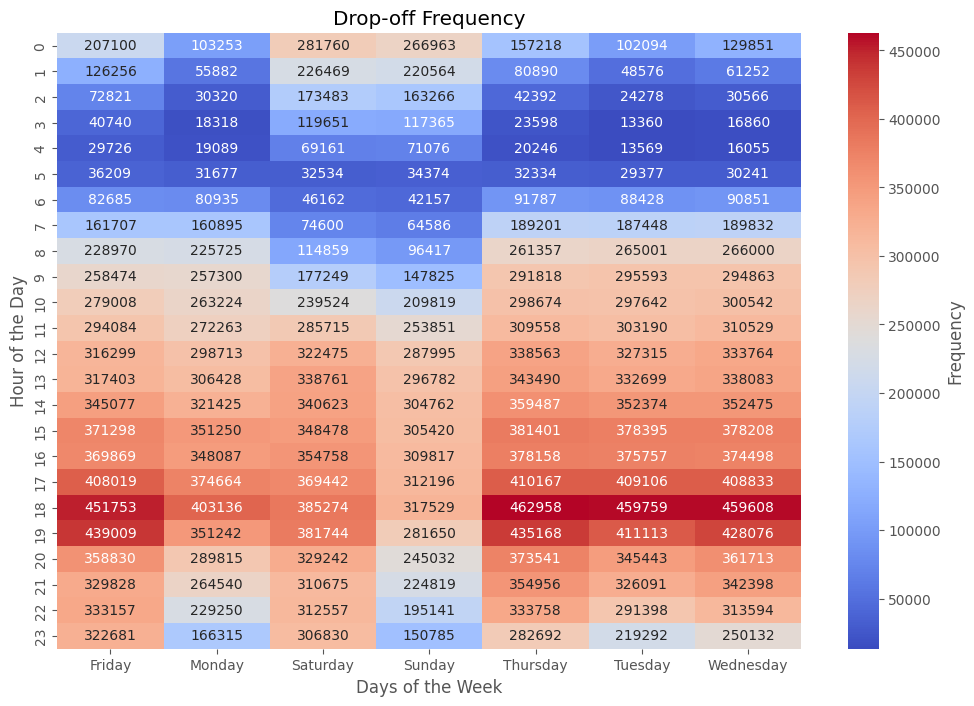

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
hours = np.arange(24)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Generate random frequencies for demonstration purposes
data = np.random.randint(0, 100, size=(24, 7))

# Create a DataFrame
df = df_pivot_do_green
# df
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(df, annot=True, fmt='d', cmap="coolwarm", cbar_kws={'label': 'Frequency'})

# Set labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Hour of the Day')
plt.title('Drop-off Frequency')

# Show the plot
plt.show()

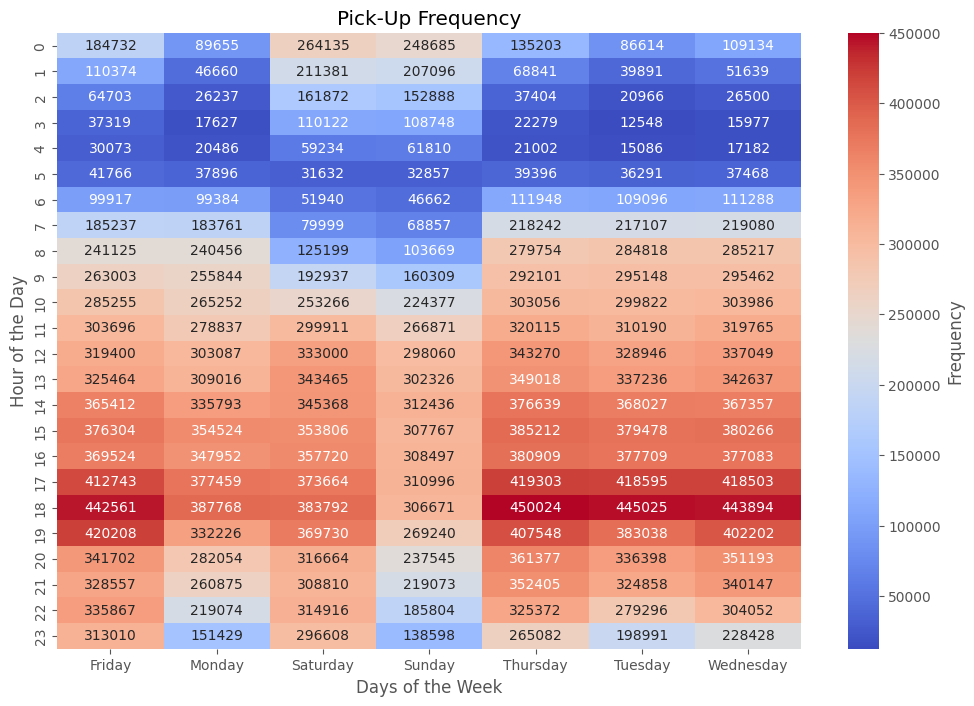

In [ ]:
# Sample data
hours = np.arange(24)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Generate random frequencies for demonstration purposes
data = np.random.randint(0, 100, size=(24, 7))

# Create a DataFrame
df = df_pivot_pu_green
# df
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(df, annot=True, fmt='d', cmap="coolwarm", cbar_kws={'label': 'Frequency'})

# Set labels and title
plt.xlabel('Days of the Week')
plt.ylabel('Hour of the Day')
plt.title('Pick-Up Frequency')

# Show the plot
plt.show()

In [ ]:
df_green = df_green[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime','store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID','passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax','tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge','total_amount', 'payment_type', 'trip_type', 'congestion_surcharge','PUDistrict', 'PUBorough', 'DOBorough', 'DODistrict','phour','dhour', 'puhour', 'dohour', 'puday', 'doday', 'duration']]
df_green = df_green.rename(columns={'puhour': 'hour'})
df_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,DOBorough,DODistrict,phour,dhour,hour,dohour,puday,doday,duration
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,Manhattan,Manhattan,3.0,0,0,0,0,Saturday,Saturday,1.200000
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,Manhattan,Manhattan,3.0,0,0,0,0,Saturday,Saturday,8.716667
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,Manhattan,Manhattan,4.0,0,1,0,1,Saturday,Saturday,16.200000
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,Brooklyn,Brooklyn,30.0,0,0,0,0,Saturday,Saturday,8.250000
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,Brooklyn,Manhattan,4.0,0,0,0,0,Saturday,Saturday,21.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840397,2,2022-12-31 23:33:00,2022-12-31 23:49:00,None,NaN,33,79,NaN,3.53,20.72,...,Brooklyn,Manhattan,4.0,23,23,23,23,Saturday,Saturday,16.000000
840398,2,2022-12-31 23:29:00,2023-01-01 00:01:00,None,NaN,49,197,NaN,8.94,39.01,...,Brooklyn,Queens,20.0,23,0,23,0,Saturday,Sunday,32.000000
840399,2,2022-12-31 23:05:00,2022-12-31 23:12:00,None,NaN,54,181,NaN,1.27,12.11,...,Brooklyn,Brooklyn,30.0,23,23,23,23,Saturday,Saturday,7.000000
840400,2,2022-12-31 23:03:00,2022-12-31 23:18:00,None,NaN,7,129,NaN,2.23,15.51,...,Queens,Queens,20.0,23,23,23,23,Saturday,Saturday,15.000000


In [ ]:
weatherdf = pd.read_csv("NYC_Weather_2016_2022.csv")

In [ ]:
weatherdf['time'] = pd.to_datetime(weatherdf['time'])
weather_df_2022 = weatherdf[weatherdf['time'].dt.year == 2022]
weather_df1 = weather_df_2022.reset_index(drop=True)
weather_df1.index += 1
weather_df1['time'] = pd.to_datetime(weather_df1['time'])
weather_df1['year'] = weather_df1['time'].dt.year
weather_df1['month'] = weather_df1['time'].dt.month
weather_df1['day'] = weather_df1['time'].dt.day
weather_df1['hour'] = weather_df1['time'].dt.hour
weather_df1['minute'] = weather_df1['time'].dt.minute
columns_order = ['time', 'year', 'month', 'day', 'hour', 'minute', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
                 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
                 'windspeed_10m (km/h)', 'winddirection_10m (°)']

weather_df1 = weather_df1[columns_order]
weather_df1 = weather_df1.dropna()
weather_df1

,time,year,month,day,hour,minute,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
1,2022-01-01 00:00:00,2022,1,1,0,0,8.7,0.0,0.0,100.0,100.0,96.0,78.0,8.3,236.0
2,2022-01-01 01:00:00,2022,1,1,1,0,8.7,0.0,0.0,100.0,100.0,93.0,100.0,7.6,225.0
3,2022-01-01 02:00:00,2022,1,1,2,0,8.6,0.0,0.0,100.0,100.0,96.0,83.0,7.4,219.0
4,2022-01-01 03:00:00,2022,1,1,3,0,8.5,0.0,0.0,100.0,100.0,97.0,100.0,7.6,205.0
5,2022-01-01 04:00:00,2022,1,1,4,0,8.2,0.0,0.0,100.0,98.0,73.0,87.0,8.6,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7004,2022-10-19 19:00:00,2022,10,19,19,0,12.2,0.0,0.0,68.0,9.0,100.0,0.0,21.2,212.0
7005,2022-10-19 20:00:00,2022,10,19,20,0,12.2,0.0,0.0,61.0,8.0,90.0,0.0,20.3,207.0
7006,2022-10-19 21:00:00,2022,10,19,21,0,12.2,0.0,0.0,62.0,21.0,72.0,0.0,16.6,207.0
7007,2022-10-19 22:00:00,2022,10,19,22,0,11.1,0.0,0.0,4.0,0.0,6.0,0.0,10.8,206.0


In [ ]:
weather_df1.groupby(['hour',"rain (mm)"], as_index=False).size()

,hour,rain (mm),size
0,0,0.0,253
1,0,0.1,9
2,0,0.2,6
3,0,0.3,1
4,0,0.4,6
...,...,...,...
436,23,1.4,1
437,23,1.7,1
438,23,2.0,1
439,23,2.2,1


In [ ]:
# df_green_hourly_pu = df_all_time.groupby('puhour', as_index=False).size()
df_green_hourly_do = df_all_time.groupby('dohour', as_index=False).size()
# df_green_hourly_pu = df_green_hourly_pu.rename(columns={'puhour': 'hour'})
df_green_hourly_do = df_green_hourly_do.rename(columns={'dohour': 'hour'})
df_green_hourly_do

,hour,size
0,0,1248239
1,1,819889
2,2,537126
3,3,349892
4,4,238922
5,5,226746
6,6,523005
7,7,1028269
8,8,1458329
9,9,1723122


In [ ]:
weather_df1.columns

Index(['time', 'year', 'month', 'day', 'hour', 'minute', 'temperature_2m (°C)',
       'precipitation (mm)', 'rain (mm)', 'cloudcover (%)',
       'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)'],
      dtype='object')

In [ ]:
df_weather_hourly = weather_df1.groupby(['hour']).agg(
    avg_temp=('temperature_2m (°C)', 'mean'),
    avg_precp=('precipitation (mm)', 'mean'),
    avg_rain=('rain (mm)', 'mean'),
    avg_cloudcover=('cloudcover (%)', 'mean'),
    avg_windspeed=('windspeed_10m (km/h)', 'mean'),
    avg_winddirection=('winddirection_10m (°)', 'mean'),
    count=('temperature_2m (°C)', 'count')
).reset_index()
df_weather_hourly

,hour,avg_temp,avg_precp,avg_rain,avg_cloudcover,avg_windspeed,avg_winddirection,count
0,0,15.519931,0.080069,0.078351,38.195876,11.053608,205.515464,291
1,1,14.910997,0.085567,0.084536,36.852234,11.254639,199.130584,291
2,2,14.415120,0.120619,0.117869,37.728522,11.357388,197.539519,291
3,3,13.651203,0.146735,0.144330,37.872852,11.441237,190.164948,291
4,4,13.424399,0.145704,0.142955,38.422680,11.409622,184.862543,291
5,5,13.008591,0.160481,0.156357,38.632302,11.390378,182.666667,291
6,6,12.802062,0.128522,0.123024,38.900344,11.362887,179.975945,291
7,7,12.546392,0.167354,0.160137,39.838488,11.304124,173.391753,291
8,8,12.286598,0.168729,0.159794,41.673540,11.252234,167.539519,291
9,9,11.918900,0.164605,0.153608,42.786942,11.203093,166.845361,291


In [ ]:
# df_weather_green_pu = pd.merge(df_green_hourly_pu,df_weather_hourly, on='hour' )
df_weather_green_do = pd.merge(df_green_hourly_do,df_weather_hourly, on='hour' )
df_weather_green_do_f =df_weather_green_do
df_weather_green_do_f

,hour,size,avg_temp,avg_precp,avg_rain,avg_cloudcover,avg_windspeed,avg_winddirection,count
0,0,1248239,15.519931,0.080069,0.078351,38.195876,11.053608,205.515464,291
1,1,819889,14.910997,0.085567,0.084536,36.852234,11.254639,199.130584,291
2,2,537126,14.415120,0.120619,0.117869,37.728522,11.357388,197.539519,291
3,3,349892,13.651203,0.146735,0.144330,37.872852,11.441237,190.164948,291
4,4,238922,13.424399,0.145704,0.142955,38.422680,11.409622,184.862543,291
5,5,226746,13.008591,0.160481,0.156357,38.632302,11.390378,182.666667,291
6,6,523005,12.802062,0.128522,0.123024,38.900344,11.362887,179.975945,291
7,7,1028269,12.546392,0.167354,0.160137,39.838488,11.304124,173.391753,291
8,8,1458329,12.286598,0.168729,0.159794,41.673540,11.252234,167.539519,291
9,9,1723122,11.918900,0.164605,0.153608,42.786942,11.203093,166.845361,291


In [ ]:
df = df_weather_green_pu
df

,hour,size,avg_temp,avg_precp,avg_rain,avg_cloudcover,avg_windspeed,avg_winddirection,count
0,0,1118158,15.519931,0.080069,0.078351,38.195876,11.053608,205.515464,291
1,1,735882,14.910997,0.085567,0.084536,36.852234,11.254639,199.130584,291
2,2,490570,14.415120,0.120619,0.117869,37.728522,11.357388,197.539519,291
3,3,324620,13.651203,0.146735,0.144330,37.872852,11.441237,190.164948,291
4,4,224873,13.424399,0.145704,0.142955,38.422680,11.409622,184.862543,291
5,5,257306,13.008591,0.160481,0.156357,38.632302,11.390378,182.666667,291
6,6,630235,12.802062,0.128522,0.123024,38.900344,11.362887,179.975945,291
7,7,1172283,12.546392,0.167354,0.160137,39.838488,11.304124,173.391753,291
8,8,1560238,12.286598,0.168729,0.159794,41.673540,11.252234,167.539519,291
9,9,1754804,11.918900,0.164605,0.153608,42.786942,11.203093,166.845361,291


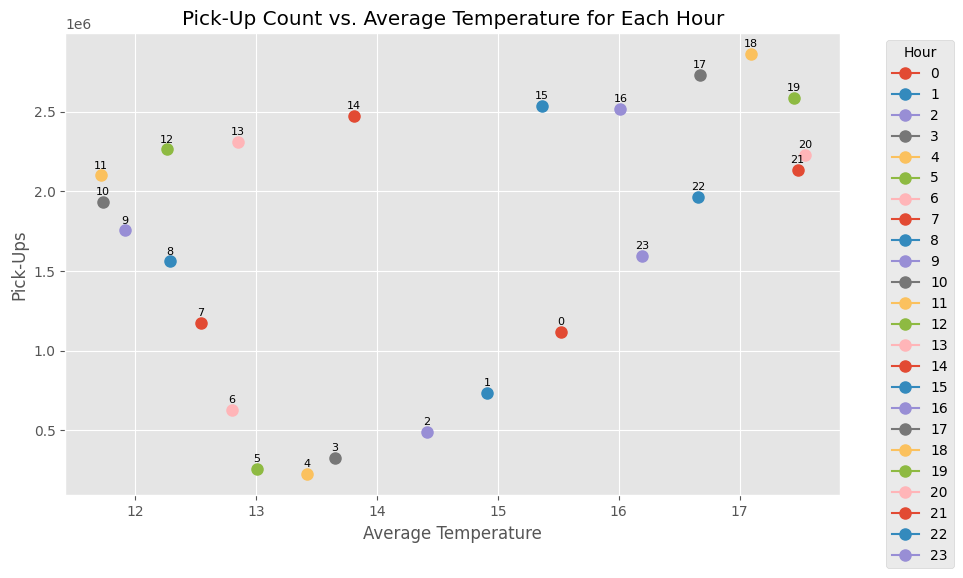

In [ ]:

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sections = df_weather_green_pu.hour.tolist()

colors = plt.cm.viridis(np.linspace(0, 1, len(sections)))

for section in sections:
    section_data = df[df['hour'] == section]
    plt.plot(section_data['avg_temp'], section_data['size'], marker='o', label=section, linestyle='-', markersize=8)
    # plt.plot(df_weather_green_pu_f['avg_temp'],p(df_weather_green_pu_f['avg_temp']), c='b')
    # Annotate each point with its section
    for i, (x, y) in enumerate(zip(section_data['avg_temp'], section_data['size'])):
        plt.annotate(f'{section}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Set labels and title
plt.xlabel('Average Temperature')
plt.ylabel('Pick-Ups')
plt.title('Pick-Up Count vs. Average Temperature for Each Hour')

# Add legend
plt.legend(title='Hour', bbox_to_anchor=(1.05, 1), loc='upper left')

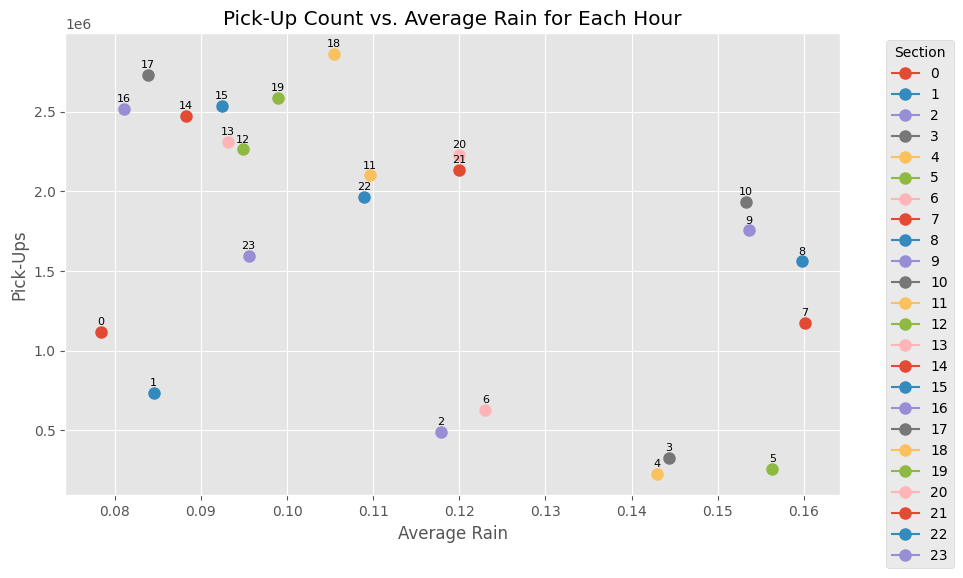

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sections = df_weather_green_pu.hour.tolist()

colors = plt.cm.viridis(np.linspace(0, 1, len(sections)))

for section in sections:
    section_data = df[df['hour'] == section]
    plt.plot(section_data['avg_rain'], section_data['size'], marker='o', label=section, linestyle='-', markersize=8)
    # plt.plot(df_weather_green_pu_f['avg_rain'],p(df_weather_green_pu_f['avg_rain']), c='b')
    # Annotate each point with its section
    for i, (x, y) in enumerate(zip(section_data['avg_rain'], section_data['size'])):
        plt.annotate(f'{section}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Set labels and title
plt.xlabel('Average Rain')
plt.ylabel('Pick-Ups')
plt.title('Pick-Up Count vs. Average Rain for Each Hour')

# Add legend
plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
sections = df_weather_green_pu.hour.tolist()

colors = plt.cm.viridis(np.linspace(0, 1, len(sections)))

for section in sections:
    section_data = df[df['hour'] == section]
    plt.plot(section_data['avg_windspeed'], section_data['size'], marker='o', label=section, linestyle='-', markersize=8)
    # plt.plot(df_weather_green_pu_f['avg_windspeed'],p(df_weather_green_pu_f['avg_windspeed']), c='b')
    # Annotate each point with its section
    for i, (x, y) in enumerate(zip(section_data['avg_windspeed'], section_data['size'])):
        plt.annotate(f'{section}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
# Set labels and title
plt.xlabel('Average Windspeed')
plt.ylabel('Pick-Ups')
plt.title('Pick-Up Count vs. Average Windspeed for Each Hour')
# plt.yscale('log')
# Add legend
plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')

KeyError: 'hour'

<Figure size 1000x600 with 0 Axes>

In [ ]:
df_crime = pd.read_excel("Transit District Crimes.xlsx")
df_crime = df_crime[['District','ASSAULT 3 & RELATED OFFENSES']]
df = df_crime

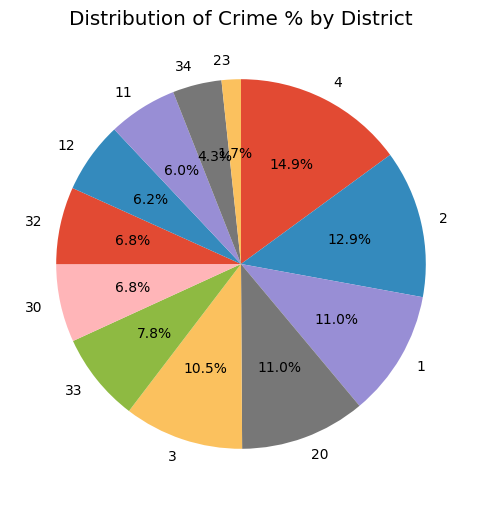

In [ ]:
# Calculate percentages
df['Percentage'] = (df['ASSAULT 3 & RELATED OFFENSES'] / df['ASSAULT 3 & RELATED OFFENSES'].sum()) * 100

# Sort by percentage for better visualization
df = df.sort_values(by='Percentage', ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Percentage'], labels=df['District'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Crime % by District')
plt.show()

In [ ]:
location_counts = df_green['PULocationID'].value_counts()

# Display the count of each category
print("Count of each category in 'PULocationID':")
location_counts
# most and least pickups

Count of each category in 'PULocationID':


PULocationID
132    1915375
237    1858969
236    1656140
161    1573000
142    1296787
        ...   
99          19
176         18
84          16
105         14
199         12
Name: count, Length: 262, dtype: int64

In [ ]:
location_counts = df_green['DOLocationID'].value_counts()

# Display the count of each category
print("Count of each category in 'PULocationID':")
print(location_counts)
# most and least drop off

Count of each category in 'PULocationID':
DOLocationID
236    1695273
237    1613062
161    1447852
170    1167949
230    1167077
        ...   
204        177
99          43
2           38
105         21
110          3
Name: count, Length: 262, dtype: int64


In [ ]:
df_green
# most and least trip

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [ ]:
df_green['tpep_pickup_datetime'] = pd.to_datetime(df_green['tpep_pickup_datetime'])
df_green['tpep_dropoff_datetime'] = pd.to_datetime(df_green['tpep_dropoff_datetime'])

df_green['pick_day_of_week'] = df_green['tpep_pickup_datetime'].dt.day_name()
df_green['drop_day_of_week'] = df_green['tpep_dropoff_datetime'].dt.day_name()


In [ ]:
df_green['pick_day_of_week'].value_counts()

pick_day_of_week
Thursday     6132989
Friday       6066825
Wednesday    5956628
Saturday     5825834
Tuesday      5781899
Monday       5107034
Sunday       4784889
Name: count, dtype: int64

In [ ]:
df_green['drop_day_of_week'].value_counts()

drop_day_of_week
Thursday     6121047
Friday       6050161
Wednesday    5950007
Saturday     5828688
Tuesday      5774052
Monday       5107501
Sunday       4824642
Name: count, dtype: int64

In [ ]:
df_green[['pick_day_of_week','drop_day_of_week']].value_counts()

pick_day_of_week  drop_day_of_week
Thursday          Thursday            6070853
Friday            Friday              5988045
Wednesday         Wednesday           5906443
Saturday          Saturday            5749916
Tuesday           Tuesday             5738343
Monday            Monday              5071317
Sunday            Sunday              4748727
Friday            Saturday              78751
Saturday          Sunday                75900
Thursday          Friday                62106
Wednesday         Thursday              50177
Tuesday           Wednesday             43538
Sunday            Monday                36151
Monday            Tuesday               35688
                  Wednesday                20
Thursday          Saturday                 17
Saturday          Monday                   15
Friday            Sunday                   10
Tuesday           Thursday                 10
Friday            Monday                   10
Sunday            Tuesday                   9

In [ ]:
df_green_monday = df_green[df_green['pick_day_of_week'] == 'Monday']

In [ ]:
# Convert the 'timestamp' column to pandas datetime if it's not already
df_green['tpep_pickup_datetime'] = pd.to_datetime(df_green['tpep_pickup_datetime'])

# Extract the hour from the timestamp
df_green['hour'] = df_green['tpep_pickup_datetime'].dt.hour

# Create a new column 'time_of_day' based on the specified time intervals
df_green['time_of_day'] = pd.cut(df_green['hour'],
                                        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
                                        labels=['00:00 - 01:00', '01:00 - 02:00', '02:00 - 03:00', '03:00 - 04:00',
                                                '04:00 - 05:00', '05:00 - 06:00', '06:00 - 07:00', '07:00 - 08:00',
                                                '08:00 - 09:00', '09:00 - 10:00', '10:00 - 11:00', '11:00 - 12:00',
                                                '12:00 - 13:00', '13:00 - 14:00', '14:00 - 15:00', '15:00 - 16:00',
                                                '16:00 - 17:00', '17:00 - 18:00', '18:00 - 19:00', '19:00 - 20:00',
                                                '20:00 - 21:00', '21:00 - 22:00', '22:00 - 23:00', '23:00 - 00:00'])

# Drop the 'hour' column if you don't need it anymore
df_green = df_green.drop('hour', axis=1)

In [ ]:
df_green_monday['lpep_pickup_datetime'] = pd.to_datetime(df_green_monday['lpep_pickup_datetime'])
df_green_monday['lpep_dropoff_datetime'] = pd.to_datetime(df_green_monday['lpep_dropoff_datetime'])

# Create a new column "timeframe" based on the pickup datetime
# df_green_monday['timeframe'] = df_green_monday['lpep_pickup_datetime'].dt.strftime('00:%H - 00:%H+1')
df_green_monday['hour'] = df_green_monday['lpep_pickup_datetime'].dt.hour
df_green_monday['pick_up_hour'] = df_green_monday['lpep_pickup_datetime'].dt.hour
df_green_monday['drop_off_hour'] = df_green_monday['lpep_dropoff_datetime'].dt.hour
df_green_monday['pick_up_timeframe'] = df_green_monday['pick_up_hour'].astype(str) + '-' + (df_green_monday['hour'] + 1).astype(str)
df_green_monday['drop_off_timeframe'] = df_green_monday['drop_off_hour'].astype(str) + '-' + (df_green_monday['hour'] + 1).astype(str)

In [ ]:
df_green_monday[['lpep_pickup_datetime',"lpep_dropoff_datetime","drop_off_timeframe", "pick_up_timeframe"]]

,lpep_pickup_datetime,lpep_dropoff_datetime,drop_off_timeframe,pick_up_timeframe
2433,2022-01-03 00:00:56,2022-01-03 00:14:47,0-1,0-1
2449,2022-01-03 00:00:15,2022-01-03 00:06:59,0-1,0-1
2471,2022-01-03 00:42:12,2022-01-03 00:52:29,0-1,0-1
2472,2022-01-03 00:11:47,2022-01-03 00:23:15,0-1,0-1
2473,2022-01-03 01:01:21,2022-01-03 01:08:28,1-2,1-2
...,...,...,...,...
839638,2022-12-26 22:22:00,2022-12-26 22:33:00,22-23,22-23
839639,2022-12-26 22:39:00,2022-12-26 22:54:00,22-23,22-23
839640,2022-12-26 22:09:00,2022-12-26 22:17:00,22-23,22-23
839641,2022-12-26 22:40:00,2022-12-26 22:45:00,22-23,22-23


In [ ]:
df_green_monday.pick_up_timeframe.value_counts()

pick_up_timeframe
17-18    8967
18-19    8657
16-17    8438
15-16    8266
14-15    7590
9-10     7162
8-9      6900
12-13    6873
11-12    6807
19-20    6801
10-11    6737
13-14    6594
7-8      5181
20-21    5043
21-22    3776
22-23    2971
23-24    2323
6-7      2294
0-1      1652
1-2       903
5-6       736
2-3       627
4-5       538
3-4       482
Name: count, dtype: int64

In [ ]:
df_green_monday.drop_off_timeframe.value_counts()


drop_off_timeframe
18-19    6836
17-18    6709
16-17    6115
15-16    5969
14-15    5553
         ... 
19-15       1
4-3         1
15-19       1
20-24       1
11-8        1
Name: count, Length: 179, dtype: int64

In [ ]:
df_green_monday[["PULocationID"	,"DOLocationID",'lpep_pickup_datetime',"lpep_dropoff_datetime","drop_off_timeframe", "pick_up_timeframe"]]

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,drop_off_timeframe,pick_up_timeframe
2433,92,179,2022-01-03 00:00:56,2022-01-03 00:14:47,0-1,0-1
2449,116,166,2022-01-03 00:00:15,2022-01-03 00:06:59,0-1,0-1
2471,74,116,2022-01-03 00:42:12,2022-01-03 00:52:29,0-1,0-1
2472,258,82,2022-01-03 00:11:47,2022-01-03 00:23:15,0-1,0-1
2473,92,73,2022-01-03 01:01:21,2022-01-03 01:08:28,1-2,1-2
...,...,...,...,...,...,...
839638,116,41,2022-12-26 22:22:00,2022-12-26 22:33:00,22-23,22-23
839639,41,48,2022-12-26 22:39:00,2022-12-26 22:54:00,22-23,22-23
839640,166,42,2022-12-26 22:09:00,2022-12-26 22:17:00,22-23,22-23
839641,129,223,2022-12-26 22:40:00,2022-12-26 22:45:00,22-23,22-23


In [ ]:
df_green_monday_drop = df_green_monday[df_green_monday['drop_off_timeframe'] == '18-19']
df_green_monday_pick = df_green_monday[df_green_monday['pick_up_timeframe'] == '17-18']

In [ ]:
location_counts = df_green_monday_drop['DOLocationID'].value_counts()

# Display the count of each category
print("Count of each category in 'PULocationID':")
print(location_counts)
# most and least drop off

Count of each category in 'PULocationID':
DOLocationID
74     380
238    336
236    278
41     259
75     248
      ... 
178      1
19       1
108      1
46       1
29       1
Name: count, Length: 214, dtype: int64


In [ ]:
location_counts = df_green_monday_pick['DOLocationID'].value_counts()

# Display the count of each category
print("Count of each category in 'PULocationID':")
print(location_counts)
# most and least drop off

Count of each category in 'PULocationID':
DOLocationID
74     580
238    398
236    358
41     329
42     300
      ... 
261      1
176      1
240      1
254      1
259      1
Name: count, Length: 225, dtype: int64


In [ ]:
df_green_monday.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,PULocationID,DOLocationID,Count
2869,74,75,3037
3041,75,74,2561
2966,74,236,1904
2852,74,41,1480
2926,74,166,1411
...,...,...,...
2312,63,141,1
2311,63,137,1
6349,173,171,1
2310,63,134,1


In [ ]:
df_green_monday_pick.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,PULocationID,DOLocationID,Count
663,75,74,349
634,74,238,152
632,74,236,125
589,74,75,124
722,75,236,118
...,...,...,...
1094,130,37,1
1095,130,38,1
1096,130,56,1
1097,130,66,1


In [ ]:
df_green_monday_drop.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,PULocationID,DOLocationID,Count
528,75,74,205
504,74,238,126
469,74,75,106
502,74,236,104
461,74,41,102
...,...,...,...
838,119,174,1
316,51,47,1
840,123,72,1
841,123,210,1


In [ ]:
df_green['duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
df_green.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'PUDistrict', 'PUBorough', 'DOBorough', 'DODistrict', 'hour', 'phour',
       'dhour', 'puhour', 'dohour', 'puday', 'doday', 'duration'],
      dtype='object')

In [ ]:
df_green.groupby(['PUBorough','puhour','puday']).agg(
    avg_total_amount=('total_amount', 'mean'),
    avg_duration=('duration', 'mean'),
    avg_trip_distance=('trip_distance', 'max'),
    count=('total_amount', 'count')
).reset_index().sort_values(by='avg_total_amount', ascending=False)

,PUBorough,puhour,puday,avg_total_amount,avg_duration,avg_trip_distance,count
773,Staten Island,16,Saturday,421.300,0.233333,0.00,1
748,Staten Island,10,Wednesday,351.400,484.583333,60.71,1
751,Staten Island,11,Saturday,312.550,330.358333,83.44,4
741,Staten Island,9,Friday,248.030,0.500000,0.00,2
346,EWR,7,Saturday,228.360,0.033333,0.00,1
...,...,...,...,...,...,...,...
789,Staten Island,18,Wednesday,5.700,0.050000,0.00,1
730,Staten Island,3,Sunday,4.565,0.991667,0.00,2
354,EWR,10,Tuesday,3.300,0.033333,0.00,1
358,EWR,13,Sunday,3.050,0.208333,0.00,2


In [ ]:
df_green.groupby(['DOLocationID']).agg(
    avg_total_amount=('total_amount', 'mean'),
    avg_duration=('duration', 'mean'),
    avg_trip_distance=('trip_distance', 'mean'),
    count=('total_amount', 'count')
).reset_index().sort_values(by='avg_total_amount', ascending=False)

,DOLocationID,avg_total_amount,avg_duration,avg_trip_distance,count
4,5,421.300000,0.191667,0.000000,2
83,84,114.090000,68.508333,35.975000,2
0,1,111.839727,56.405595,220.886887,697
171,176,82.765000,58.495833,19.240000,4
238,245,81.177143,44.245238,14.818571,7
...,...,...,...,...,...
41,42,10.717001,12.666239,43.121147,31354
73,74,9.953521,10.676920,23.559342,41782
40,41,9.629007,10.313759,29.361042,32308
200,207,9.482359,21.115728,1.473169,284
